In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [1]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Create a scikit-learn model
model = RandomForestClassifier()

# Train the model on your data

# Save the model to a file
joblib.dump(model, 'SD.pkl')

['SD.pkl']

## 1. Function to load and preprocess NASA data


In [2]:
def load_nasa_data(file_path):
    # In a real scenario, this would load data from NASA APIs
    # For this example, we'll simulate the data
    np.random.seed(42)
    data = pd.DataFrame({
        'year': range(1980, 2024),
        'sea_level_rise': np.cumsum(np.random.normal(0.3, 0.1, 44)),
        'temperature_anomaly': np.cumsum(np.random.normal(0.02, 0.005, 44)),
        'extreme_weather_events': np.random.poisson(lam=10, size=44),
        'deforestation_rate': np.random.normal(0.5, 0.1, 44),
        'displacement': np.cumsum(np.random.normal(100000, 20000, 44))
    })
    return data

## 2. Load and preprocess the data


In [3]:
data = load_nasa_data("nasa_climate_data.csv")  # This would be a real file in practice

# Prepare features (X) and target variable (y)
X = data[['sea_level_rise', 'temperature_anomaly', 'extreme_weather_events', 'deforestation_rate']]
y = data['displacement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Create and train the model to make predictions


In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

Mean Squared Error: 6942441918.382233
R-squared Score: 0.9956660709356722


## 4. Visualize feature importance


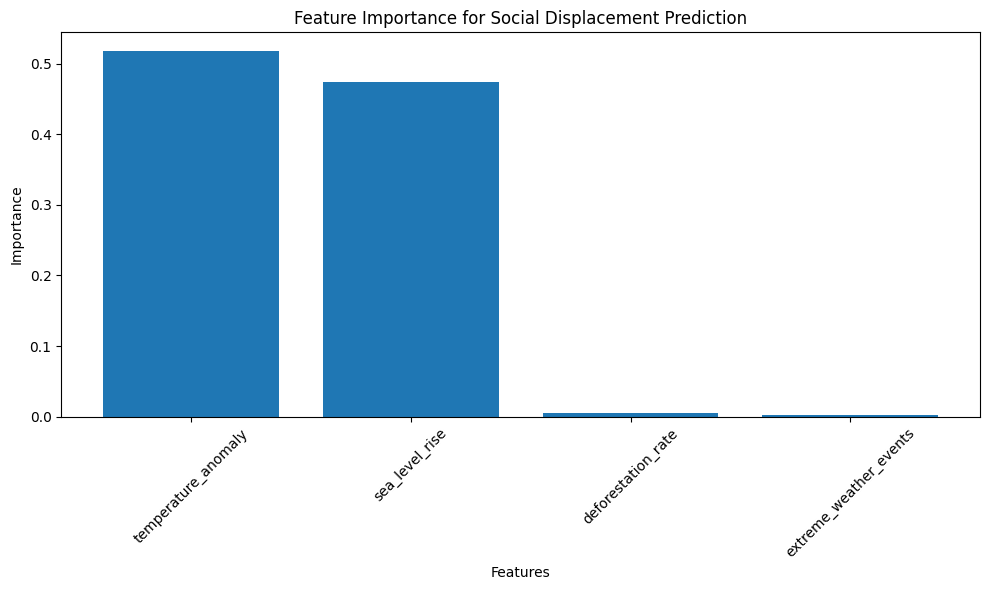

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance for Social Displacement Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Function to predict displacement based on new data


In [12]:
def predict_displacement(new_data):
    new_data_scaled = scaler.transform(new_data)
    return model.predict(new_data_scaled)

# Example usage
new_environmental_data = pd.DataFrame({
    'sea_level_rise': [10],
    'temperature_anomaly': [1.5],
    'extreme_weather_events': [15],
    'deforestation_rate': [0.7]
})

predicted_displacement = predict_displacement(new_environmental_data)
print(f"Predicted Displacement: {predicted_displacement[0]:.0f} people")

Predicted Displacement: 3819998 people
